## ML Starter Notebook

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/placement.csv')

In [20]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [3]:
df.shape

(100, 4)

In [4]:
df = df.iloc[:,1:]

In [24]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [25]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
import matplotlib.pyplot as plt


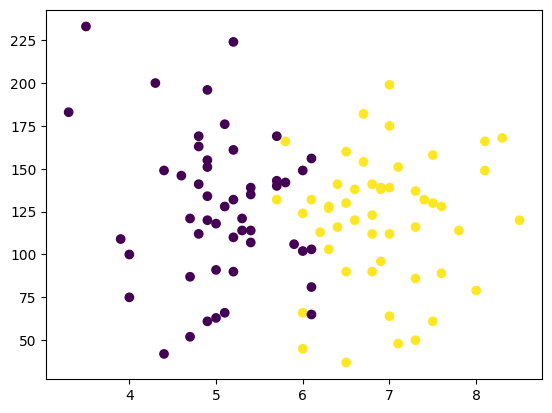

In [27]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [29]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [8]:
y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
X_train

,cgpa,iq
18,4.0,100.0
30,7.6,128.0
73,4.9,61.0
33,6.0,149.0
90,7.3,86.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [33]:
y_train

22    0
77    1
27    1
30    1
49    0
     ..
52    1
65    1
87    1
31    0
34    0
Name: placement, Length: 90, dtype: int64

In [34]:
X_test

,cgpa,iq
15,5.1,176.0
43,6.8,141.0
61,7.3,137.0
26,7.0,199.0
2,5.3,121.0
58,8.0,79.0
97,6.7,182.0
93,6.8,112.0
48,6.6,138.0
89,4.9,151.0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [18]:
X_test = scaler.transform(X_test)

In [40]:
X_test

array([[-0.73411068,  1.37524953],
       [ 0.75158951,  0.49439633],
       [ 1.18856016,  0.3937274 ],
       [ 0.92637777,  1.95409592],
       [-0.55932243, -0.00894835],
       [ 1.80031906, -1.06597219],
       [ 0.66419538,  1.52625294],
       [ 0.75158951, -0.23545346],
       [ 0.57680125,  0.41889463],
       [-0.90889894,  0.74606868]])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = clf.predict(X_test)

In [45]:
y_test

15    0
43    1
61    1
26    1
2     0
58    1
97    1
93    1
48    1
89    0
Name: placement, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.8

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

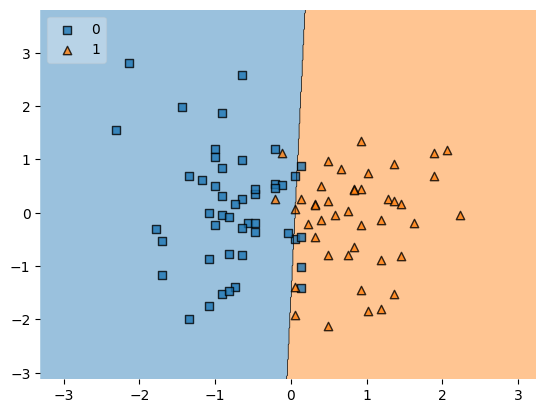

In [51]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [52]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))